In [1280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [1281]:
df = pd.read_csv("bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1282]:
df.describe(include = "all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [1283]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Age

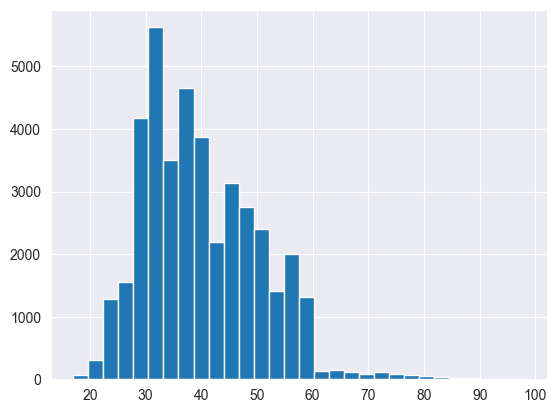

In [1284]:
df["age"].hist(bins=30)
plt.show()

Vecina ljudi koji su anketirani su ljudi godina izmedju 25-50

## Job

<Axes: xlabel='job', ylabel='count'>

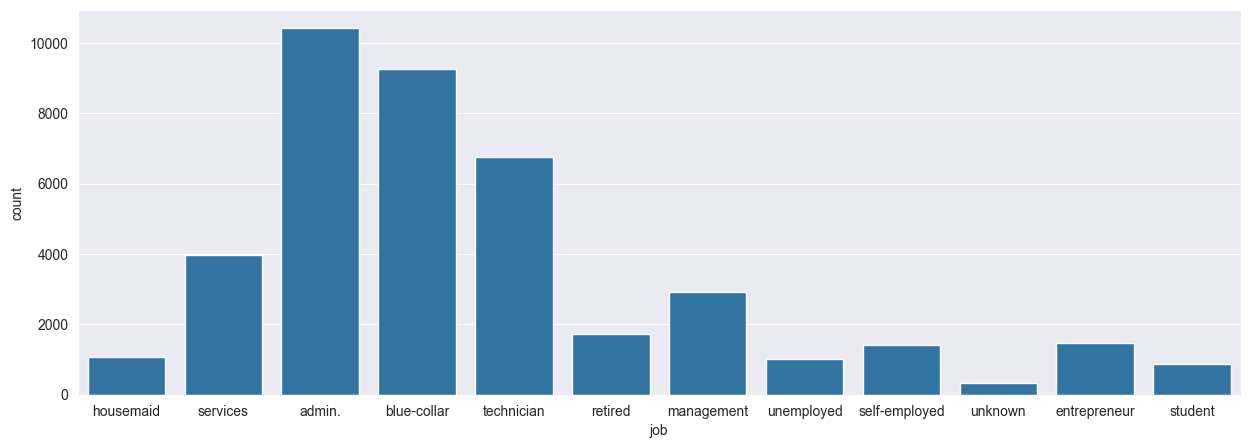

In [1285]:
plt.figure(figsize=(15,5))
sns.countplot(x = "job", data = df)

## Marital

<Axes: xlabel='marital', ylabel='count'>

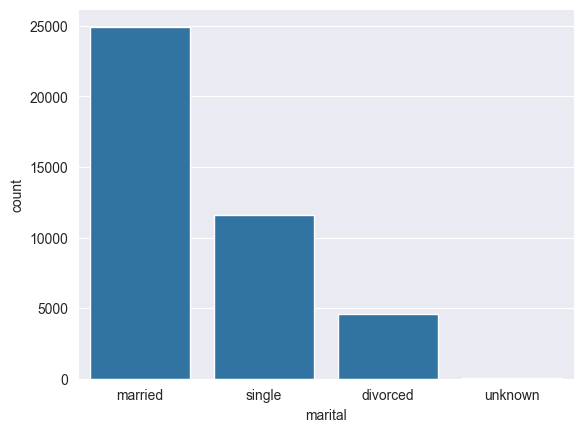

In [1286]:
sns.countplot(x = "marital", data = df)

## Education

<Axes: xlabel='education', ylabel='count'>

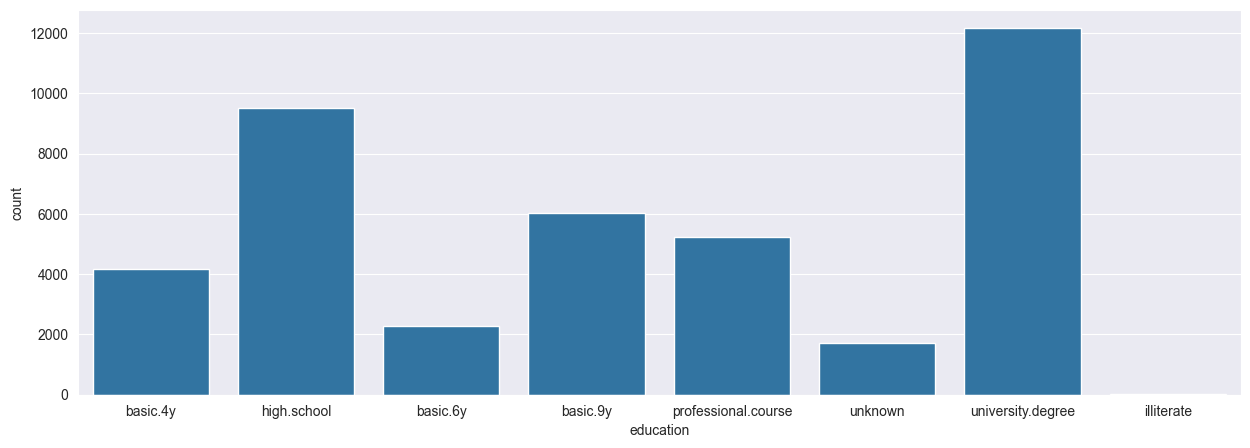

In [1287]:
plt.figure(figsize=(15,5))
sns.countplot(x = "education", data = df)

<Axes: xlabel='education', ylabel='count'>

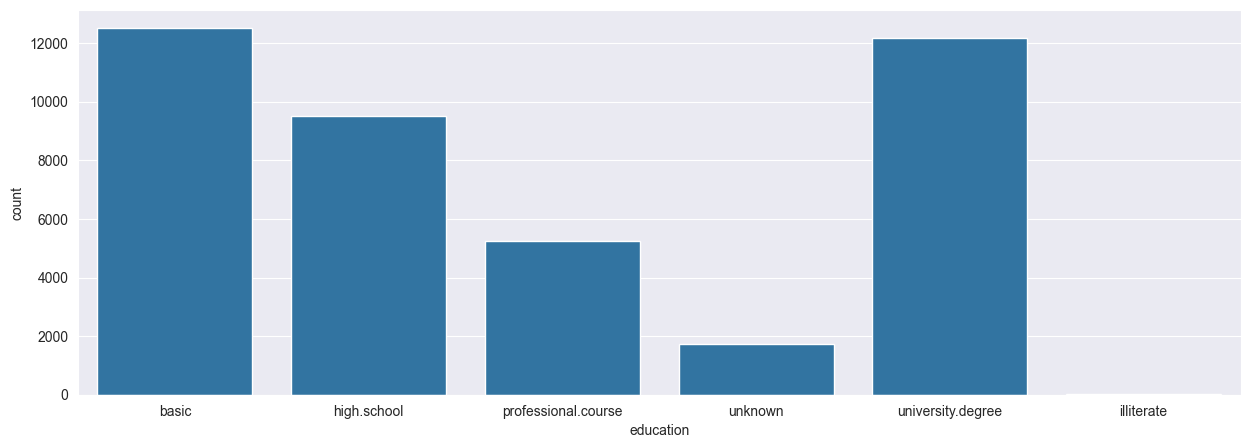

In [1288]:
df.replace(['basic.4y','basic.6y','basic.9y'],'basic',inplace = True)
plt.figure(figsize=(15,5))
sns.countplot(x = "education", data = df)

Zamijenili smo basic4, basic6, basic9 sa jednim basic.

## Month

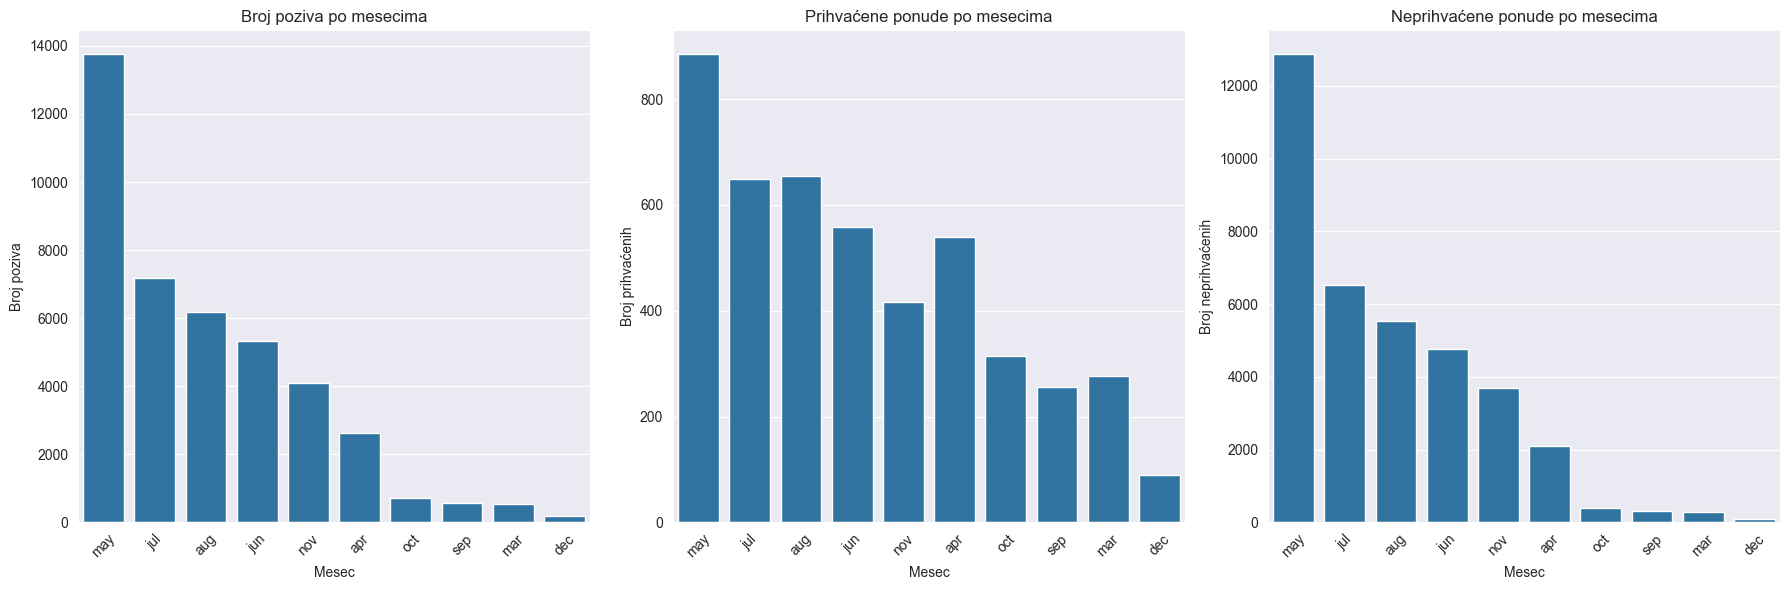

In [1289]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 red, 3 kolone

# 1. Ukupan broj poziva po mesecima
sns.countplot(data=df, x='month', order=df['month'].value_counts().index, ax=axes[0])
axes[0].set_title('Broj poziva po mesecima')
axes[0].set_xlabel('Mesec')
axes[0].set_ylabel('Broj poziva')
axes[0].tick_params(axis='x', rotation=45)

# 2. Broj prihvaćenih ponuda po mesecima
sns.countplot(data=df[df['y'] == 'yes'], x='month', order=df['month'].value_counts().index, ax=axes[1])
axes[1].set_title('Prihvaćene ponude po mesecima')
axes[1].set_xlabel('Mesec')
axes[1].set_ylabel('Broj prihvaćenih')
axes[1].tick_params(axis='x', rotation=45)

# 3. Broj neprihvaćenih ponuda po mesecima
sns.countplot(data=df[df['y'] == 'no'], x='month', order=df['month'].value_counts().index, ax=axes[2])
axes[2].set_title('Neprihvaćene ponude po mesecima')
axes[2].set_xlabel('Mesec')
axes[2].set_ylabel('Broj neprihvaćenih')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Stopa uspjesnosti po mjesecima

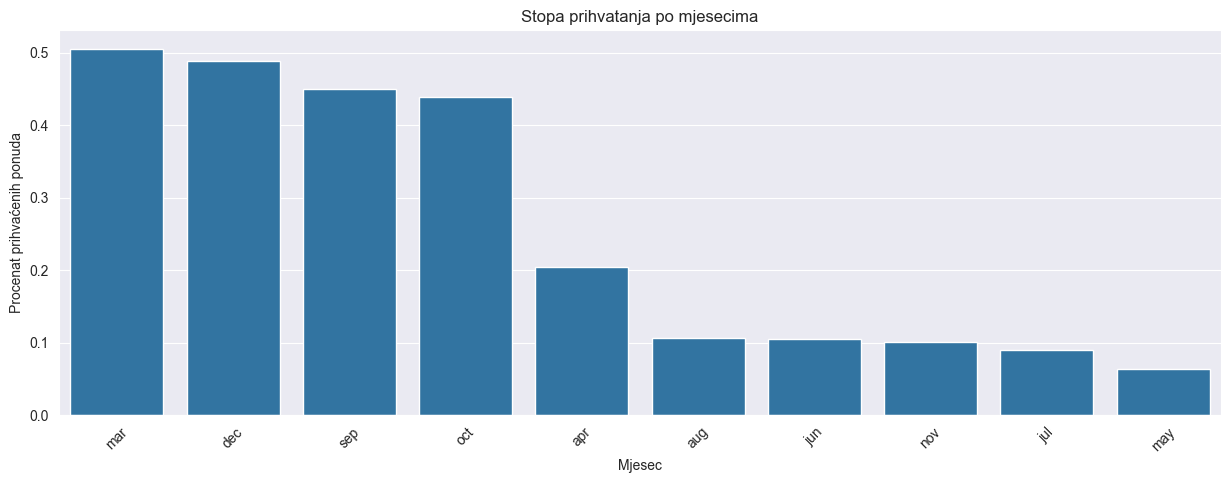

In [1290]:
# Grupisanje po mesecima i računanje stope uspešnosti
success_rate = df.groupby('month')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']
success_rate = success_rate.sort_values(ascending=False)

# Vizualizacija
plt.figure(figsize=(15,5))
sns.barplot(x=success_rate.index, y=success_rate.values)
plt.title('Stopa prihvatanja po mjesecima')
plt.ylabel('Procenat prihvaćenih ponuda')
plt.xlabel('Mjesec')
plt.xticks(rotation=45)
plt.show()

## Day of week

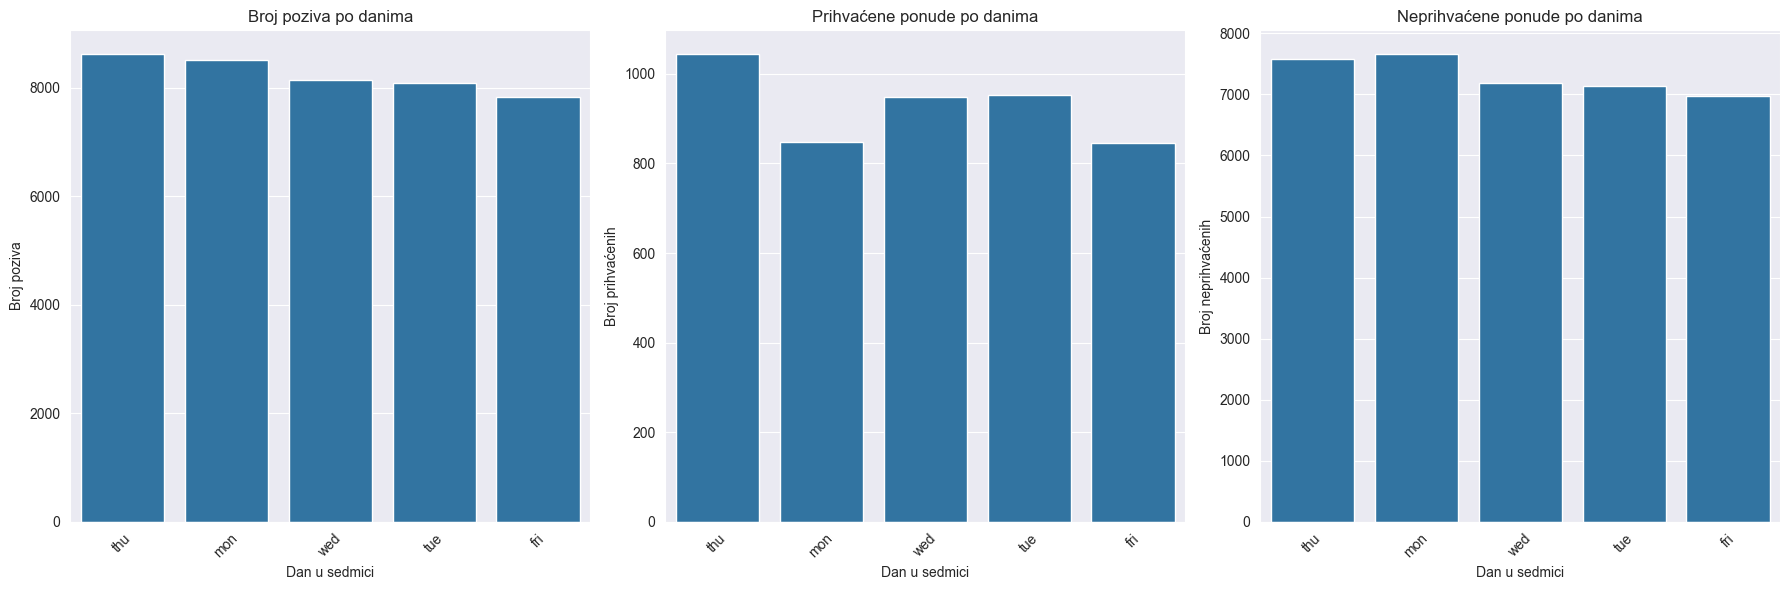

In [1291]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 red, 3 kolone

# 1. Ukupan broj poziva po danima
sns.countplot(data=df, x='day_of_week', order=df['day_of_week'].value_counts().index, ax=axes[0])
axes[0].set_title('Broj poziva po danima')
axes[0].set_xlabel('Dan u sedmici')
axes[0].set_ylabel('Broj poziva')
axes[0].tick_params(axis='x', rotation=45)

# 2. Broj prihvaćenih ponuda po danima
sns.countplot(data=df[df['y'] == 'yes'], x='day_of_week', order=df['day_of_week'].value_counts().index, ax=axes[1])
axes[1].set_title('Prihvaćene ponude po danima')
axes[1].set_xlabel('Dan u sedmici')
axes[1].set_ylabel('Broj prihvaćenih')
axes[1].tick_params(axis='x', rotation=45)

# 3. Broj neprihvaćenih ponuda po danima
sns.countplot(data=df[df['y'] == 'no'], x='day_of_week', order=df['day_of_week'].value_counts().index, ax=axes[2])
axes[2].set_title('Neprihvaćene ponude po danima')
axes[2].set_xlabel('Dan u sedmici')
axes[2].set_ylabel('Broj neprihvaćenih')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Najvise odbijenih ponuda je bilo u ponedeljak iako je najveci broj poziva bio u cetvrtak, ovo moze da nam bude klijentsko ponasanje znacajno za analizu, a i ima smisla jer su ljudi nervozniji ponedeljkom, prvi radni dan.

## Stopa uspjesnosti po danima u sedmici

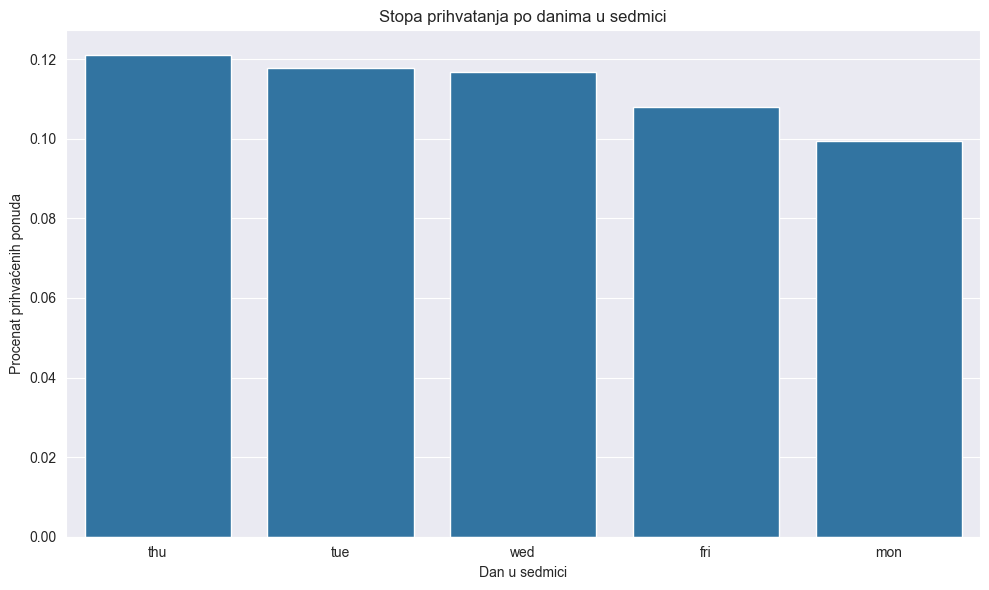

In [1292]:
success_rate_day = df.groupby('day_of_week')['y'].apply(lambda x: (x == 'yes').mean())
success_rate_day = success_rate_day.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=success_rate_day.index, y=success_rate_day.values)
plt.title('Stopa prihvatanja po danima u sedmici')
plt.ylabel('Procenat prihvaćenih ponuda')
plt.xlabel('Dan u sedmici')
plt.tight_layout()
plt.show()


## Default (da li posjeduje kreditno zaduzenje - da/ne/nepoznato)

In [1293]:
df["default"].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Samo 3 osobe imaju kreditno zaduzenje, premalo da model nauci bilo sta, a ako sve podatke koji su unknown zamijenimo sa no, onda su svi podaci u toj koloni no i moze doci do pretreniranja na te podatke. Zbog toga tu kolonu necu uzimati u obzir.

## Housing (posjedovanje stambenog kredita - da/ne/ nepoznato)

In [1296]:
df["housing"].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

Posto vecina ima stambeni kredit, 'unknown' cemo zamijeniti sa 'yes'

In [1297]:
df["housing"] = df["housing"].replace(["unknown"],"yes")
df["housing"].value_counts()

housing
yes    22566
no     18622
Name: count, dtype: int64

## Loan (posedovanje ličnog kredita - da/ne/ nepoznato)

In [1298]:
df["loan"].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [1299]:
df["loan"] = df["loan"].replace(["unknown"], "no")
df["loan"].value_counts()

loan
no     34940
yes     6248
Name: count, dtype: int64

## P days

In [1301]:
#Kreiramo novu binarnu kolonu
df['bio_kontaktiran_ranije'] = (df['pdays'] != 999).astype(int)
df.drop('pdays', axis=1, inplace=True)

## Poutcome - ishod prethodne kampanje (nepoznat, neuspeh, uspeh)

In [1306]:
pd.crosstab(df["poutcome"],df["y"])

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


Model nauči kolika je osnovna (baseline) verovatnoća da potpuno nov klijent pristane na ponudu, na osnovu svih njegovih drugih karakteristika (posao, godine, bračni status, itd.). Pošto je ovo najveća grupa, ona formira temelj za razumevanje ponašanja "prosečnog" novog klijenta.

## Konvertovanje

Ne mozemo direktno da radimo sa tekstualnim kategorijama, pa ih pretvaramo u numericke vrijednosti.
Koristim OneHot Encoder.

## ONE HOT ENCODING

In [1312]:
# Lista kategoričkih kolona za enkodiranje
categorical_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Primena pd.get_dummies
df_final = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Mapiranje ciljne promenljive
df_final['y'] = df_final['y'].map({'yes': 1, 'no': 0})

### Odvajanje podataka za treniranje

In [1325]:
# Odvajanje X i y

X = df_final.drop('y', axis=1)
y = df_final['y']

kolone_za_izbacivanje = ['default', 'duration']
for col in kolone_za_izbacivanje:
    if col in X.columns:
        X = X.drop(col, axis=1)

Klasa '0'('no') je dominantnija od klase '1', ne smijem to izignorisati jer ce se model pretrenirati za 'no' i predvidjati samo 'no'. Racunam tezine klasa.

# Train - Test

In [1320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Skaliranje

In [ ]:
from sklearn.preprocessing import StandardScaler
# Identifikacija numeričkih kolona koje treba skalirati
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Skaliranje
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# LOGISTIC REGRESSION

In [1362]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=3000)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}

print("Pokretanje GridSearchCV za pronalaženje najboljeg modela sa fokusom na Recall...")
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"\nNajbolji parametri pronađeni putem GridSearch-a: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred_final = best_model.predict(X_test)

print("FINALNI IZVEŠTAJ (model optimizovan za RECALL putem GridSearch-a):")
print(classification_report(y_test, y_pred_final))

Pokretanje GridSearchCV za pronalaženje najboljeg modela sa fokusom na Recall...

Najbolji parametri pronađeni putem GridSearch-a: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
FINALNI IZVEŠTAJ (model optimizovan za RECALL putem GridSearch-a):
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     10965
           1       0.36      0.64      0.46      1392

    accuracy                           0.83     12357
   macro avg       0.66      0.75      0.68     12357
weighted avg       0.88      0.83      0.85     12357



In [1369]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,y_pred_final)
print("Confusion matrix: \n", cm1)

Confusion matrix: 
 [[9391 1574]
 [ 495  897]]


# Random Forest

In [1346]:
# from sklearn.ensemble import RandomForestClassifier
#
# model2 = RandomForestClassifier(class_weight = "balanced")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'class_weight': ['balanced']
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)
model2 = grid.best_estimator_
print("Najbolji parametri:", grid.best_params_)


Najbolji parametri: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}


In [1347]:
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)

In [1348]:
cm2 = confusion_matrix(y_test,pred2)
print(cm2)

[[10009   956]
 [  579   813]]


In [1349]:
print("Classification Report using Random Forest Classifier: ")
print(classification_report(y_test,pred2))

Classification Report using Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     10965
           1       0.46      0.58      0.51      1392

    accuracy                           0.88     12357
   macro avg       0.70      0.75      0.72     12357
weighted avg       0.89      0.88      0.88     12357



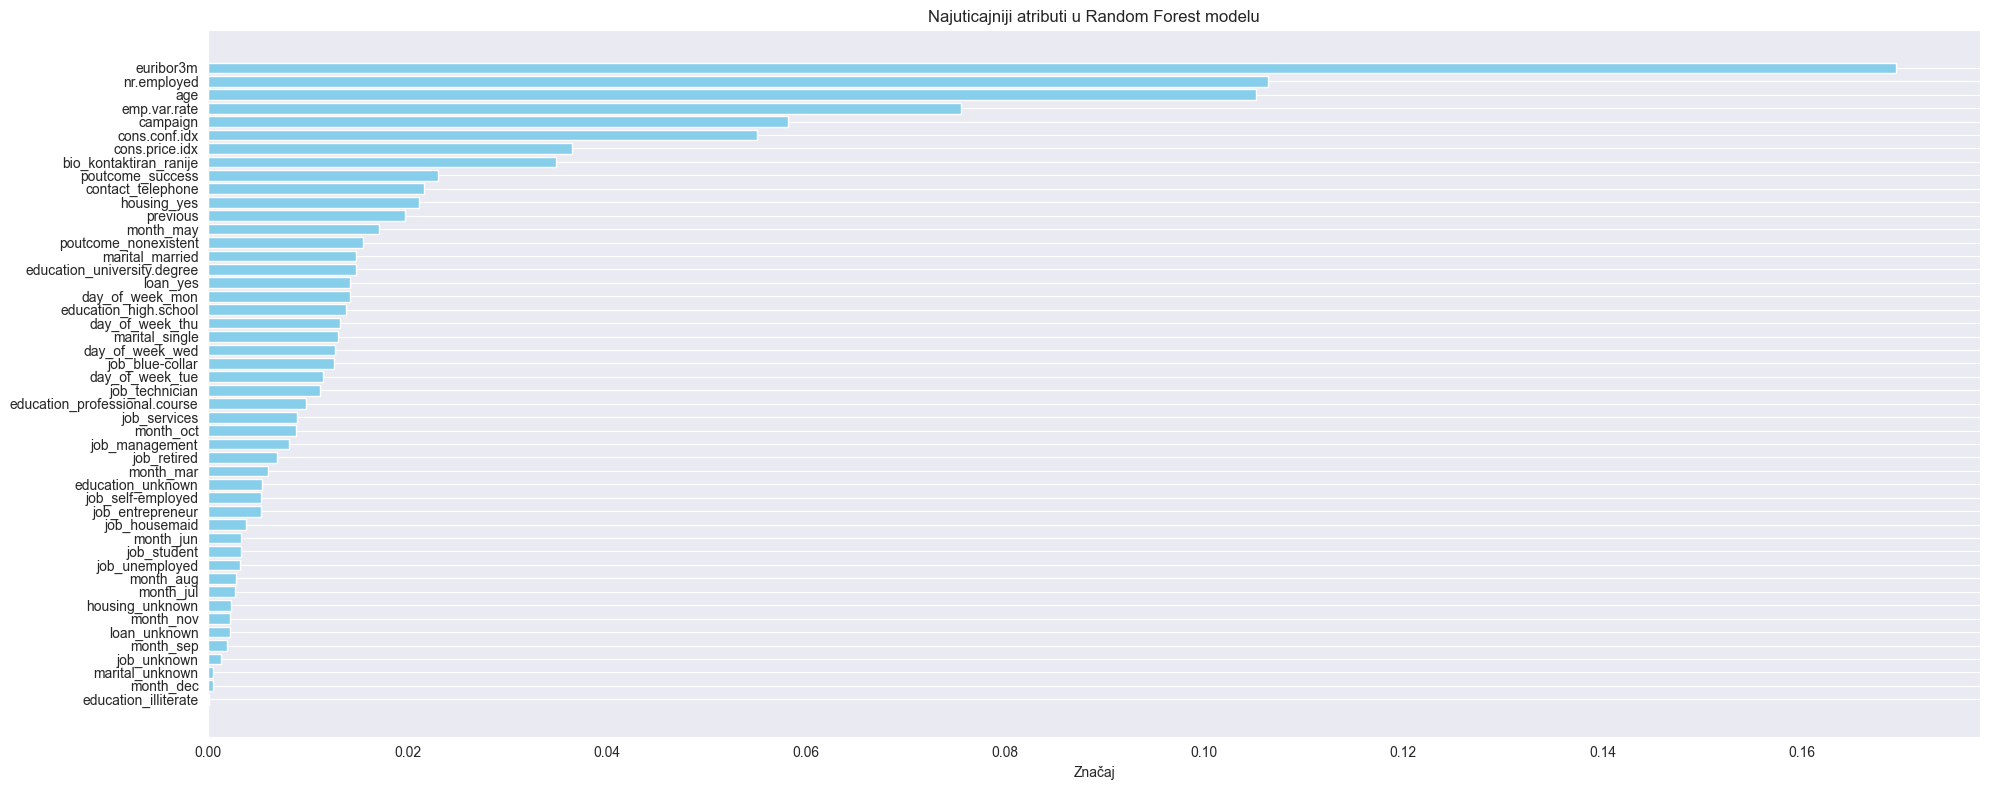

In [1351]:
# 1. Dobijanje značaja atributa
importances = model2.feature_importances_
feature_names = X.columns

# 2. Kreiranje DataFrame-a sa značajem
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. Vizualizacija
plt.figure(figsize=(20, 8))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.xlabel('Značaj')
plt.title('Najuticajniji atributi u Random Forest modelu')
plt.gca().invert_yaxis()  # Najvažniji na vrhu
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## XGBoost

Izračunata vrednost za scale_pos_weight: 7.88
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Najbolji parametri za XGBoost: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}

FINALNI IZVEŠTAJ za najbolji XGBoost model (GridSearch):
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10965
           1       0.40      0.63      0.49      1392

    accuracy                           0.85     12357
   macro avg       0.68      0.75      0.70     12357
weighted avg       0.89      0.85      0.87     12357

Matrica konfuzije za najbolji XGBoost:
[[9676 1289]
 [ 519  873]]

Prikaz važnosti atributa...


<Figure size 1000x800 with 0 Axes>

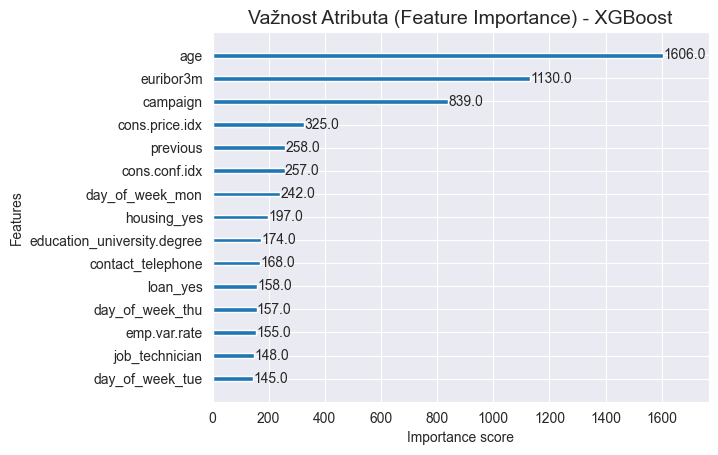

In [1359]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Izračunata vrednost za scale_pos_weight: {scale_pos_weight:.2f}")
#Jedan 'DA' odgovor vredi koliko scale_pos_weight 'NE' odgovora, izbjegavamo neuravnotezenost podataka

xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42,
)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],    # Broj stabala
    'max_depth': [3, 5, 7],             # Maksimalna dubina stabla
    'learning_rate': [0.05, 0.1],       # "Brzina učenja" modela
    'subsample': [0.7, 1.0]             # Procenat podataka za treniranje svakog stabla
}

grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='f1', # Ciljna metrika je F1-skor
    cv=3,         # Unakrsna validacija sa 3 folda (brže od 5)
    n_jobs=-1,    # Koristi sva CPU jezgra
    verbose=1     # Ispisuje napredak tokom treniranja
)

grid_xgb.fit(X_train, y_train)

print(f"\nNajbolji parametri za XGBoost: {grid_xgb.best_params_}")

best_xgb_model = grid_xgb.best_estimator_

y_pred_final = best_xgb_model.predict(X_test)

print("\nFINALNI IZVEŠTAJ za najbolji XGBoost model (GridSearch):")
print(classification_report(y_test, y_pred_final))

print("Matrica konfuzije za najbolji XGBoost:")
print(confusion_matrix(y_test, y_pred_final))

#Feature Importance
print("\nPrikaz važnosti atributa...")
plt.figure(figsize=(10, 8))
plot_importance(best_xgb_model, max_num_features=15) # Prikazujemo 15 najvažnijih
plt.title('Važnost Atributa (Feature Importance) - XGBoost', fontsize=14)
plt.show()